# HEALTHCARE (cardiovascular health)

Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 

Age	Age in years;
Sex	1 = male; 0 = female;
cp|	Chest pain type;
trestbps	Resting blood pressure (in mm Hg on admission to the hospital);
chol	Serum cholesterol in mg/dl;
fbs	Fasting blood sugar > 120 mg/dl (1 = true; 0 = false);
restecg	Resting electrocardiographic results;
thalach	Maximum heart rate achieved;
exang	Exercise induced angina (1 = yes; 0 = no);
oldpeak	ST depression induced by exercise relative to rest;
slope	Slope of the peak exercise ST segment;
ca	Number of major vessels (0-3) colored by fluoroscopy;
thal	3 = normal; 6 = fixed defect; 7 = reversible defect;
Target	1 or 0;


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')

### There are a few libraries required to build a machine learning model:
* pandas - It helps to retrieve datasets, handle missing data and do data wrangling.
* Numpy - It helps to perform numerical operations in the dataset.
* warnings - It helps to neglect the unwanted popups or exceptions.
* matplotlib - It helps in data visualization.
* seaborn - It also helps in data visualization and exploratory data analysis.
* matplotlib inline - It is used to plot the charts or graphs in the notebook itself.


In [2]:
df=pd.read_excel('1645792390_cep1_dataset.xlsx')
df1=df.copy()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Note:**  
* The **`df`** is a dataframe to store the data imported from the csv as rows and columns table format.
* The **head()** function helps to view the first few data present in the **`df`** dataframe.
* The **.copy()** function helps to copy dataframe in **`df1`** dataframe.


## a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Identify the total number of duplicates after performing duplication operation

In [5]:
df=df.drop(164)

In [6]:
df.duplicated().sum()

0

<AxesSubplot:>

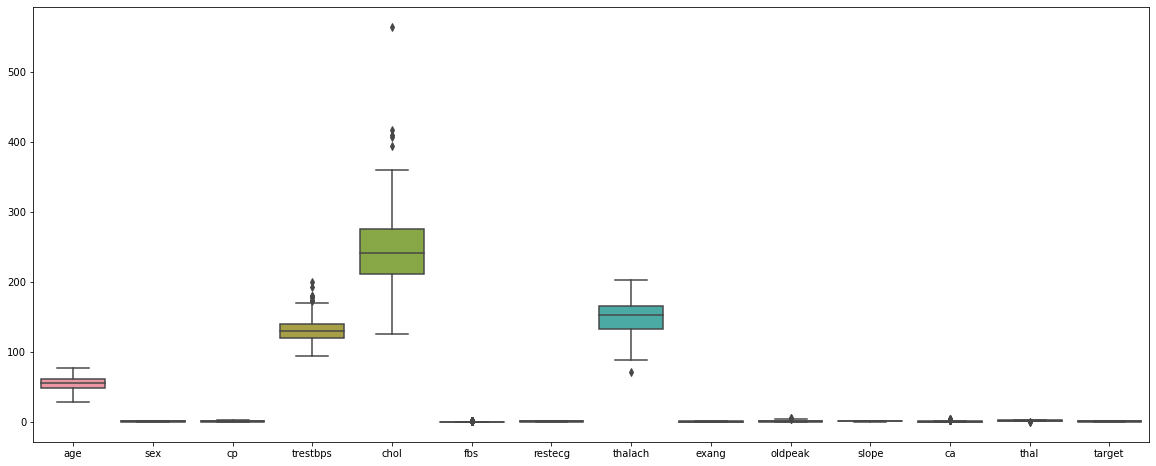

In [7]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df)

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
cols=['sex','cp','fbs','restecg','exang','oldpeak','slope','ca','thal','target']
for i in range(len(cols)):
    s=df[cols[i]].unique()
    print(cols[i], '    ',s,'\n')

sex      [1 0] 

cp      [3 2 1 0] 

fbs      [1 0] 

restecg      [0 1 2] 

exang      [0 1] 

oldpeak      [2.3 3.5 1.4 0.8 0.6 0.4 1.3 0.  0.5 1.6 1.2 0.2 1.8 1.  2.6 1.5 3.  2.4
 0.1 1.9 4.2 1.1 2.  0.7 0.3 0.9 3.6 3.1 3.2 2.5 2.2 2.8 3.4 6.2 4.  5.6
 2.9 2.1 3.8 4.4] 

slope      [0 2 1] 

ca      [0 2 1 3 4] 

thal      [1 2 3 0] 

target      [1 0] 



BINARY VARIABLES-


sex,fbs,exang,target

CATEGORICAL VARIBALES-

cp,restecg,slope,ca,thal

#### Continuous- 
age, trestbps, chol, thalac, oldpeak

In [11]:
c=['cp','restecg','slope','ca','thal']
for i in range(len(c)):
    print(c[i],'\n  ')
    print(df[c[i]].value_counts(),'\n')
    print(c[i],'unique values-  ',df[c[i]].nunique(),'\n  ')

cp 
  
0    143
2     86
1     50
3     23
Name: cp, dtype: int64 

cp unique values-   4 
  
restecg 
  
1    151
0    147
2      4
Name: restecg, dtype: int64 

restecg unique values-   3 
  
slope 
  
2    141
1    140
0     21
Name: slope, dtype: int64 

slope unique values-   3 
  
ca 
  
0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64 

ca unique values-   5 
  
thal 
  
2    165
3    117
1     18
0      2
Name: thal, dtype: int64 

thal unique values-   4 
  


## Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [12]:
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [13]:
outliers(df[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


<AxesSubplot:>

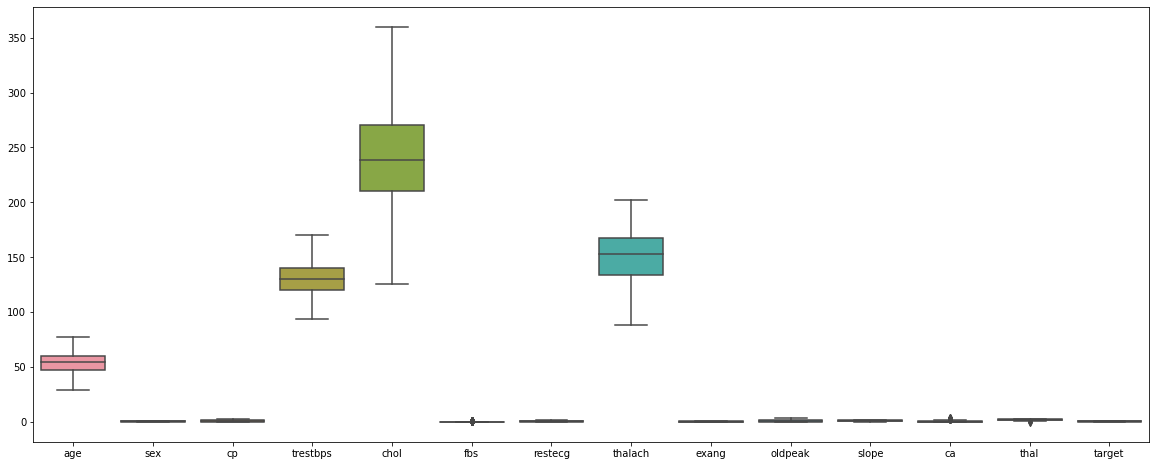

In [14]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df)

## Check for missing values and replace them

Feature ‘ca’ ranges from 0–3, however, df.nunique() listed 0–4. So lets find the ‘4’ and change them to NaN.
Feature ‘thal’ ranges from 1–3, however, df.nunique() listed 0–3. There are two values of ‘0’. So lets change them to NaN.

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
df.loc[df['ca']==4, 'ca']=np.NaN
df.loc[df['thal']==0, 'thal']=np.NaN

In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

<AxesSubplot:>

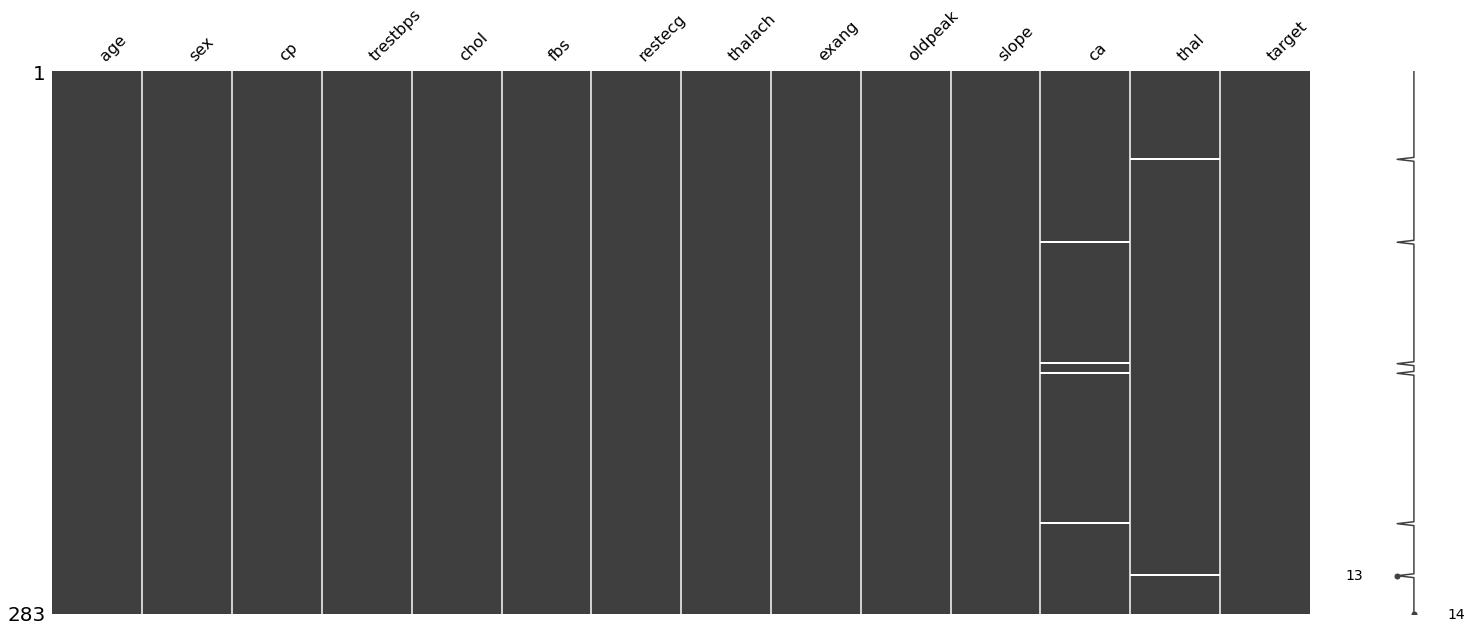

In [18]:
msno.matrix(df)

In [19]:
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
df['slope'] = df.slope.replace({0: "upsloping", 1: "flat",2:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [21]:
continous_features = ['age','trestbps','chol','thalach','oldpeak'] 

In [22]:
df[continous_features[0]].value_counts()

58    18
57    17
54    15
52    12
59    12
51    11
44    11
60    11
41    10
56     9
62     9
64     9
42     8
45     8
53     8
61     8
63     8
43     8
50     7
48     7
65     7
46     7
67     7
55     6
66     6
47     5
49     5
35     4
39     4
70     4
69     3
40     3
71     3
68     3
38     2
34     2
37     2
74     1
76     1
29     1
77     1
Name: age, dtype: int64

In [23]:
def cat_plot(var):
    f,axes = plt.subplots(1,2, figsize = (18,7))
    vc = df[var].value_counts() 
    nouniq = df[var].nunique()
    # overall pie
    vc.plot.pie(radius = 1.25,ax = axes[0], cmap = 'spring', autopct = '%0.1f%%',
                                        textprops = {'family': 'DejaVu Sans','color': 'black','size': 16},
                                        explode = [0.02]*nouniq,shadow = True,)
    axes[0].set_ylabel('')
    axes[0].set_title('Overall {} Distribution\n'.format(var.capitalize()),family='DejaVu Sans',fontsize= 20)
    
    # count plot
    #pd.crosstab(df[var], df.target).plot.bar(cmap = 'hsv', ax = axes[1])
    sns.countplot(x = df[var], hue = df.target, ax = axes[1], palette='gist_rainbow')
    plt.xticks( fontsize = 15, color = 'black' , family =  'DejaVu Sans', rotation = 0)
    axes[1].set_xlabel(var.capitalize(),fontsize = 16, color = 'black' , family =  'DejaVu Sans', rotation = 0)
    axes[1].set_ylabel('Count',fontsize = 16, color = 'black' , family =  'DejaVu Sans')
    axes[1].legend(['Disease -','Disease +'])
    axes[1].set_title('Heart Disease by {}\n'.format( var.capitalize()) ,family='DejaVu Sans',fontsize= 20)
    plt.tight_layout(pad = 4 )
    plt.show()

# Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

Primary Statistical Summary:
Explore the measures of central tendencies and the spread of the data overall.

In [24]:
df.describe()

,age,trestbps,chol,restecg,thalach,oldpeak,ca
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,129.883392,242.314488,0.522968,149.961131,0.951943,0.639576
std,9.128186,15.387795,44.654188,0.514336,22.691625,1.026400,0.905532
min,29.000000,94.000000,126.000000,0.000000,88.000000,0.000000,0.000000
25%,47.000000,120.000000,210.500000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,239.000000,1.000000,153.000000,0.600000,0.000000
75%,60.000000,140.000000,270.500000,1.000000,168.000000,1.600000,1.000000
max,77.000000,170.000000,360.000000,2.000000,202.000000,4.000000,3.000000


# Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

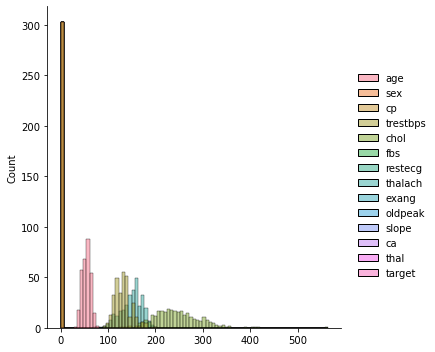

In [25]:
sns.displot(data=df1)

*Count plot for every feature.

In [26]:
dsprsnt = df[df1.target == 1].copy()
dsabsnt = df[df1.target == 0].copy()

In [27]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


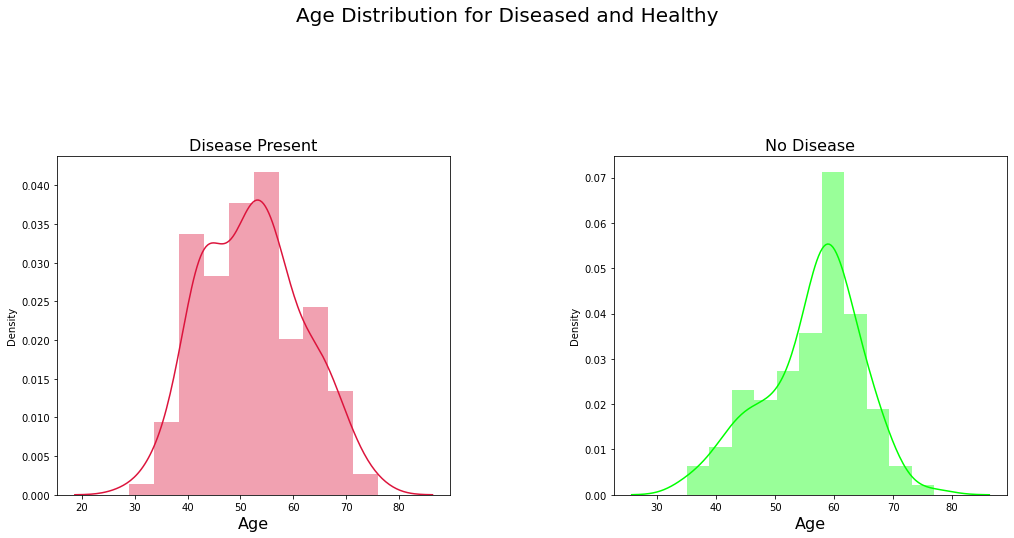

In [28]:
f,axes = plt.subplots(1,2, figsize = (15,8))
sns.distplot(dsprsnt.age,ax = axes[0], color = 'crimson')
sns.distplot(dsabsnt.age, ax = axes[1], color = 'lime')
axes[0].set_title('Disease Present',fontdict = {'family': 'DejaVu Sans','size': 16})
axes[1].set_title('No Disease',fontdict = {'family': 'DejaVu Sans','size': 16})
axes[0].set_xlabel('Age', fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
axes[1].set_xlabel('Age',fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
f.suptitle('Age Distribution for Diseased and Healthy\n\n ',fontsize= 20)
plt.tight_layout(w_pad= 12, pad = 4 )
plt.show()

Observation:

Based on the graph, we can see that the accumulation of total number of people present in particular age group for healthy and disease.


In [29]:
t=df.nunique()<5
t=t[[i for i, x in enumerate(t) if x]]
l=t.index[[i for i, x in enumerate(t)]]
crosstab = pd.crosstab(index=df.nunique()[df.nunique()<5], columns=l)
crosstab

col_0,ca,cp,exang,fbs,restecg,sex,slope,target,thal
row_0,,,,,,,,,
2,0,0,1,1,0,1,0,1,0
3,0,0,0,0,1,0,1,0,1
4,1,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='row_0'>

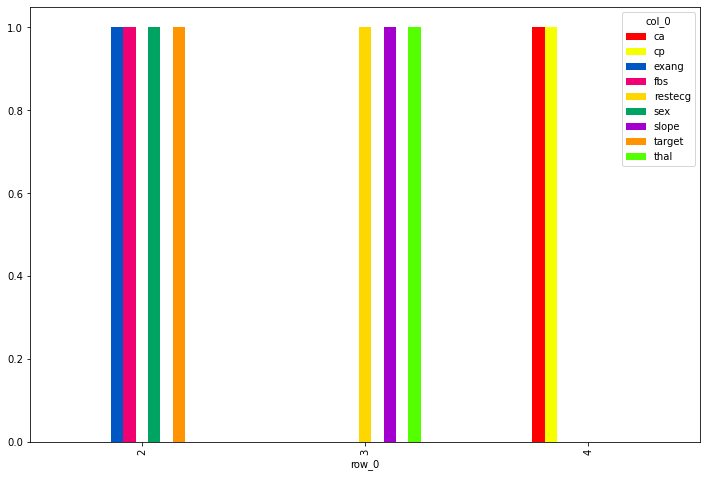

In [30]:
crosstab.plot(kind="bar", figsize=(12,8), stacked=False, colormap='prism')

In [31]:
lis=t.index[[i for i,x in enumerate(t)]]
countdf=pd.DataFrame(columns=[lis],data=[list(df1[lis].nunique())])
countdf

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,2,4,2,3,2,3,5,4,2


<AxesSubplot:>

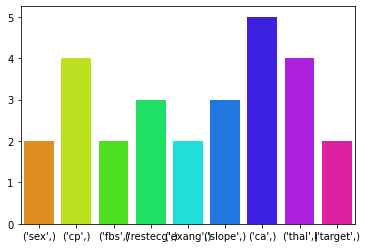

In [32]:
sns.barplot(data=countdf, palette='hsv')

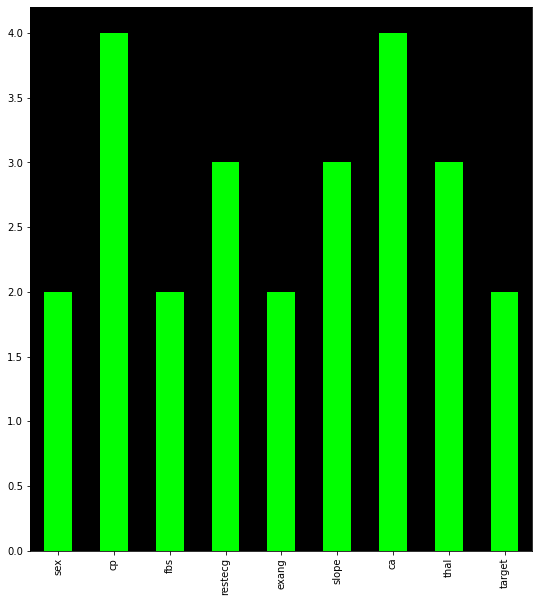

In [33]:
plt.figure(figsize=(9,10))
df.nunique()[df.nunique()<5].plot(kind='bar',color='lime').set_facecolor('black')

Disease       158
No_disease    125
Name: target, dtype: int64


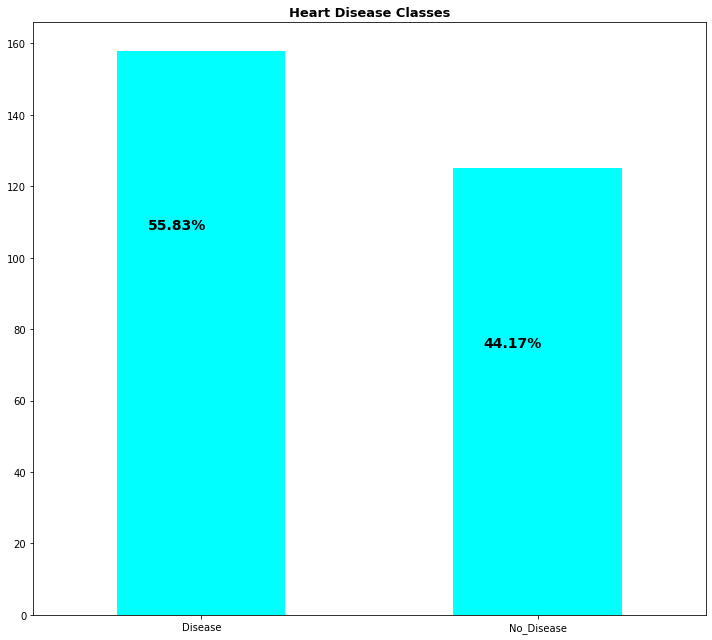

In [34]:
print(df.target.value_counts())

# df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes') #Simple plot

fig, ax = plt.subplots(figsize=(10,9))
name = ["Disease", "No_Disease"]
ax = df.target.value_counts().plot(kind='bar', color='aqua')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')
    
plt.tight_layout()

there are more heart disease patients

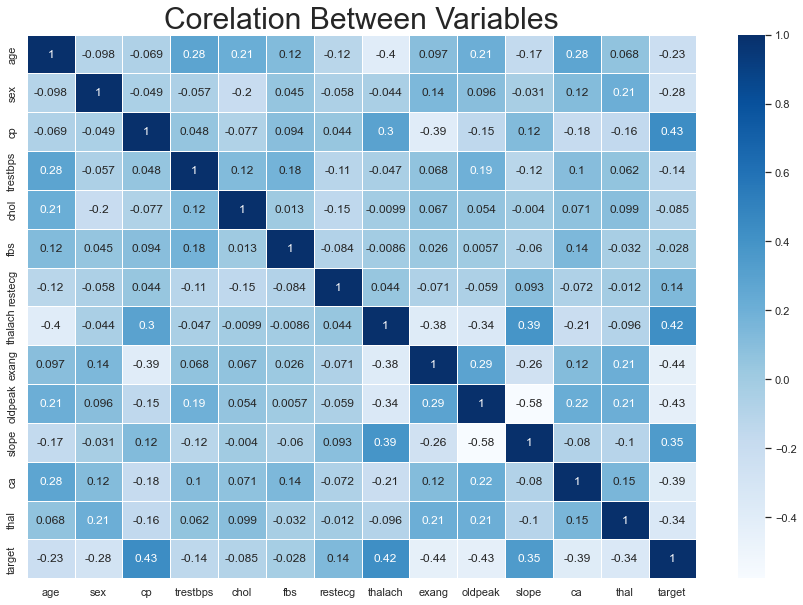

In [35]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df1.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

In [36]:
print(df1.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

# Study the occurrence of CVD across the Age category

In [37]:
df1[df1['age']>70]['target']

25     1
60     1
129    1
144    1
151    1
238    0
Name: target, dtype: int64

In [38]:
df1[df1['target']==1]['age']

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

In [39]:
df1.loc[(df1.age>=20) & (df1.age<=30),'age_group']='20-30'
df1.loc[(df1.age>=31) & (df1.age<=40),'age_group']='31-40'
df1.loc[(df1.age>=41) & (df1.age<=50),'age_group']='41-50'
df1.loc[(df1.age>=51) & (df1.age<=60),'age_group']='51-60'
df1.loc[(df1.age>=61) & (df1.age<=70),'age_group']='61-70'
df1.loc[(df1.age>=71) & (df1.age<=80),'age_group']='71-80'

In [40]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,61-70
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,31-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,51-60
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,41-50
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,61-70
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,51-60


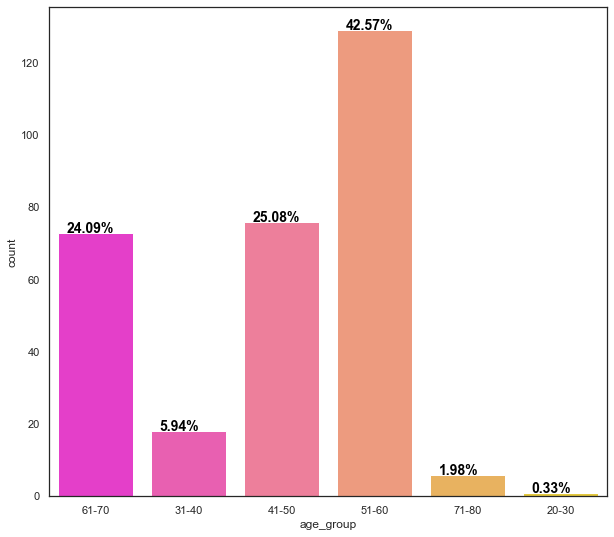

In [41]:
fig, ax = plt.subplots(figsize=(10,9))

ax=sns.countplot(x='age_group',data=df1, palette='spring')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height(), 
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')

Text(0.5, 1.0, 'Age Distribution')

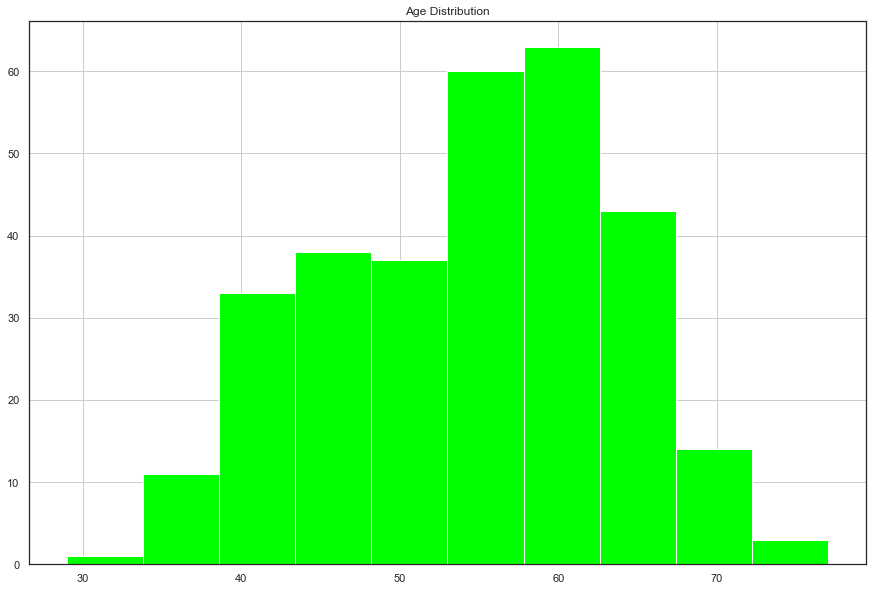

In [42]:
df1['age'].hist(color='lime').plot(kind='bar')
plt.title('Age Distribution')

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
Name: age, dtype: int64


Text(0, 0.5, 'Frequency')

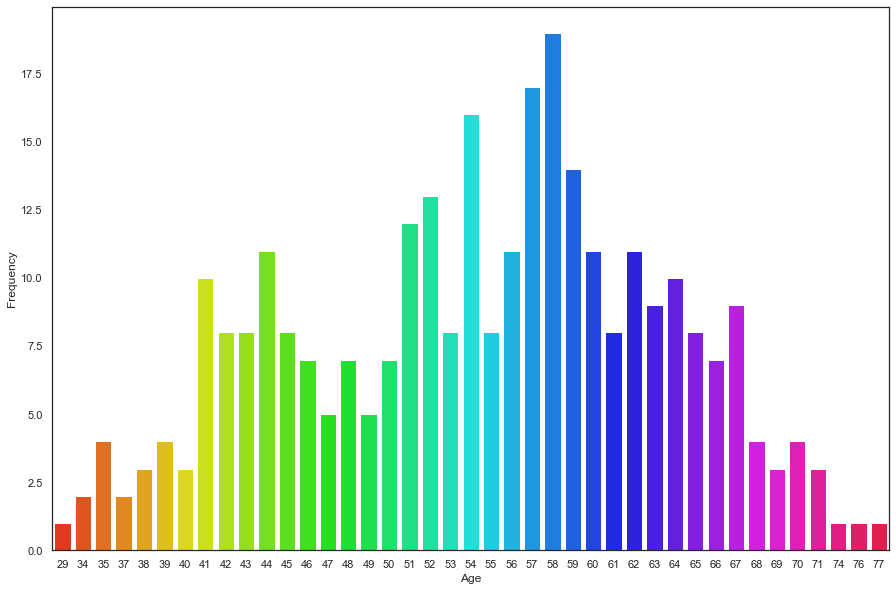

In [43]:
print(df1.age.value_counts()[:10])
sns.barplot(x=df1.age.value_counts().index,y=df1.age.value_counts().values,palette='hsv')
plt.xlabel('Age')
plt.ylabel('Frequency')


In [44]:
df1['age'].value_counts().index

Int64Index([58, 57, 54, 59, 52, 51, 62, 60, 44, 56, 64, 41, 63, 67, 65, 43, 45,
            55, 42, 61, 53, 46, 48, 66, 50, 49, 47, 70, 39, 35, 68, 38, 71, 40,
            69, 34, 37, 29, 74, 76, 77],
           dtype='int64')

58    18
57    17
54    15
52    12
59    12
51    11
44    11
60    11
41    10
56     9
Name: age, dtype: int64


Text(0, 0.5, 'Age distribution')

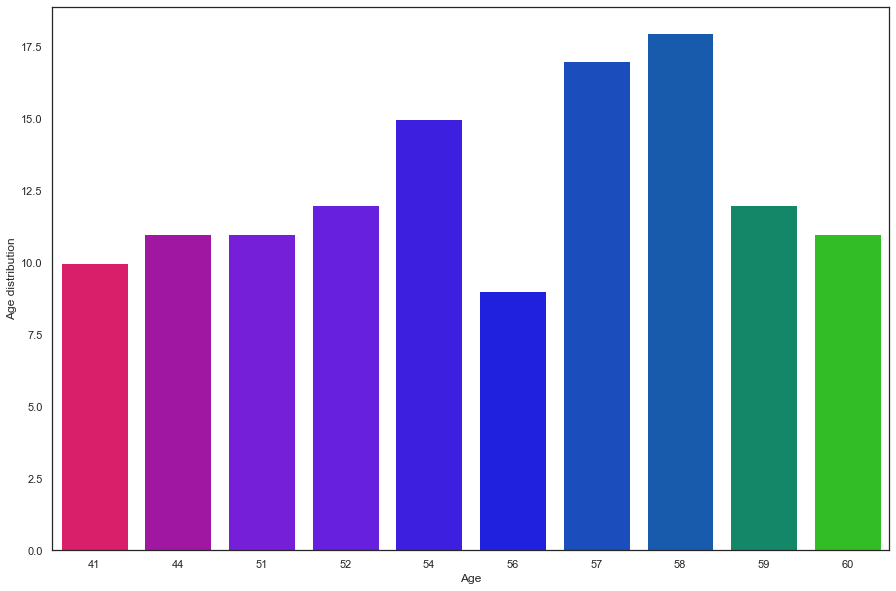

In [45]:
print(df.age.value_counts()[:10])
sns.barplot(x=df.age.value_counts()[:10].index,
y=df.age.value_counts()[:10].values,
palette='prism')
plt.xlabel('Age')
plt.ylabel('Age distribution')

# Study the composition of all patients with respect to the Sex category

Sex(1=male, 0=female)
Target(1= CVD present, 0= CVD absent)

In [46]:
df1.groupby(['target','sex'])['sex'].size()

target  sex
0       0       24
        1      114
1       0       72
        1       93
Name: sex, dtype: int64

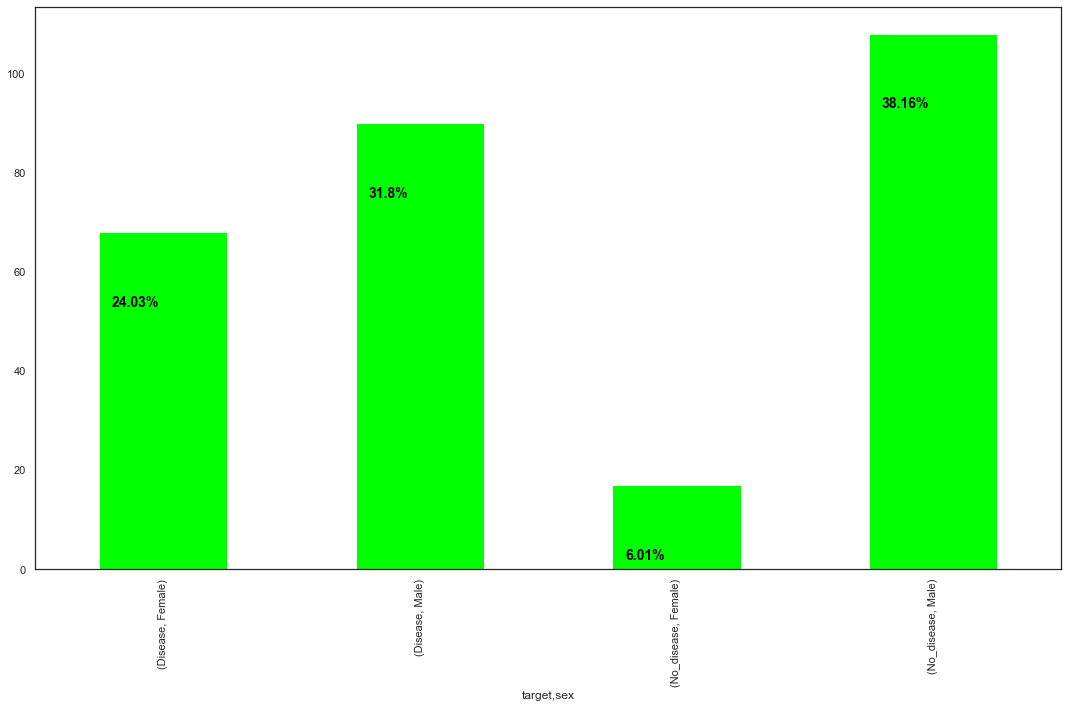

In [47]:
ax=df.groupby(['target','sex'])['sex'].size().plot(kind='bar',color='lime')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')  
plt.tight_layout()

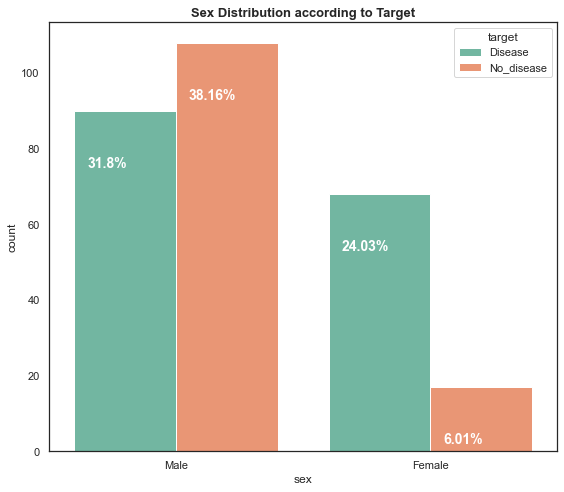

In [48]:

fig, ax = plt.subplots(figsize=(8,7))
 

name = df['sex'].unique()
sns.countplot(x='sex', hue='target', data=df, palette='Set2')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

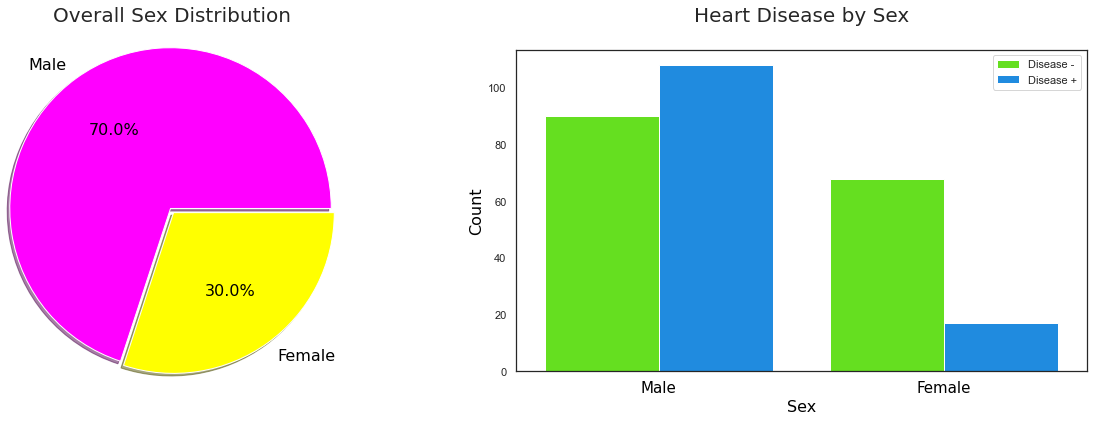

In [49]:
cat_plot('sex')

# Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

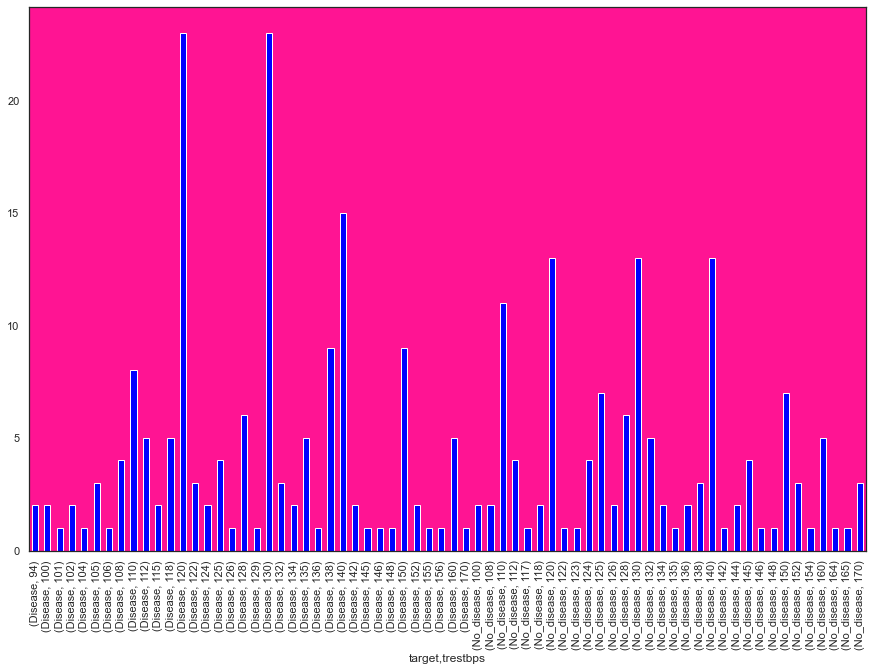

In [50]:
df.groupby(['target','trestbps'])['target'].size().plot(kind='bar', color='blue').set_facecolor('deeppink')

As we would normaly guess, higher the blood pressure, higher are the chances of CVD, but we found mixed results.
*there is no gradual increase showing from bp 94 to 170, in cvd cases, or decrement from 100 to 170 in healthy people.
*then we found most cases in CVD from 120 and 130 bp, at the same time healthy people with no disease have 120,130, even higher bp.

In [51]:
df_bp=df[['trestbps','target']]
df_bp[df_bp['target']=='Disease'].mode()

,trestbps,target
0,120,Disease
1,130,NaN


In [52]:
df_bp[df_bp['target']=='No_disease'].mode()

,trestbps,target
0,120,No_disease
1,130,NaN
2,140,NaN


In [53]:
df_bp[df_bp['trestbps']==130]

,trestbps,target
1,130,Disease
2,130,Disease
11,130,Disease
12,130,Disease
21,130,Disease
29,130,Disease
32,130,Disease
41,130,Disease
43,130,Disease
50,130,Disease


In [54]:
df_bp[df_bp['target']=='Disease'].value_counts()

trestbps  target 
130       Disease    23
120       Disease    23
140       Disease    15
138       Disease     9
150       Disease     9
110       Disease     8
128       Disease     6
112       Disease     5
135       Disease     5
160       Disease     5
118       Disease     5
125       Disease     4
108       Disease     4
132       Disease     3
122       Disease     3
105       Disease     3
134       Disease     2
142       Disease     2
94        Disease     2
124       Disease     2
100       Disease     2
152       Disease     2
115       Disease     2
102       Disease     2
146       Disease     1
155       Disease     1
156       Disease     1
148       Disease     1
129       Disease     1
145       Disease     1
136       Disease     1
126       Disease     1
106       Disease     1
104       Disease     1
101       Disease     1
170       Disease     1
dtype: int64

In [55]:
df_bp[df_bp['target']=='No_disease'].value_counts()

trestbps  target    
140       No_disease    13
120       No_disease    13
130       No_disease    13
110       No_disease    11
150       No_disease     7
125       No_disease     7
128       No_disease     6
160       No_disease     5
132       No_disease     5
145       No_disease     4
112       No_disease     4
124       No_disease     4
170       No_disease     3
152       No_disease     3
138       No_disease     3
144       No_disease     2
136       No_disease     2
100       No_disease     2
108       No_disease     2
134       No_disease     2
126       No_disease     2
118       No_disease     2
142       No_disease     1
123       No_disease     1
146       No_disease     1
148       No_disease     1
122       No_disease     1
154       No_disease     1
117       No_disease     1
164       No_disease     1
165       No_disease     1
135       No_disease     1
dtype: int64

In that case, we find mode( most occurences of cvd cases' bp units), its 120 and 130.but at the same time, 120 , 130 has mixed results of healthy and cvd both.and its not like very less cases are from 120,130 bps in healthy, turnedout they had the highest cases in both cvd and healthy.hence we cant conclude relation that much.
*then we found mode of bps all together, who knows, 120, 130 could be the highest in number of cases entered.
turned out. this is exactly what happened:-

In [56]:
df['trestbps'].mode()

0    120
1    130
Name: trestbps, dtype: int64

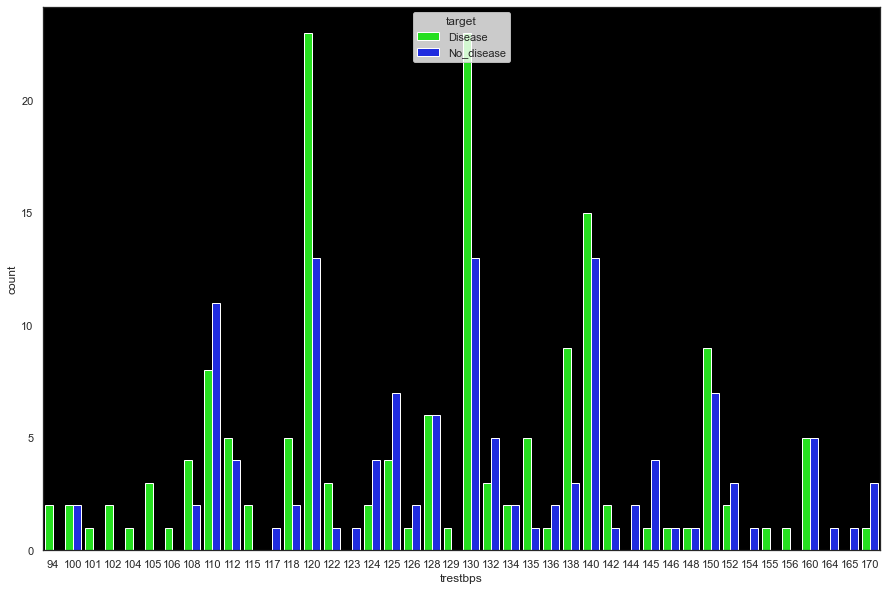

In [57]:
sns.countplot(x='trestbps', hue='target', data=df, palette='hsv').set_facecolor('black')

# Describe the relationship between cholesterol levels and a target variable

In [58]:
df_chol=df[['target','chol']]
df_chol[df_chol['target']=='Disease'].value_counts()

target   chol
Disease  234     4
         211     4
         204     4
         226     4
         197     4
                ..
         253     1
         254     1
         255     1
         256     1
         360     1
Length: 100, dtype: int64

In [59]:
df_chol[df_chol['target']=='No_disease'].value_counts()

target      chol
No_disease  254     4
            212     4
            282     4
            230     3
            229     3
                   ..
            255     1
            259     1
            260     1
            261     1
            353     1
Length: 88, dtype: int64

In [60]:
df[df['target']=='Disease']['thalach']

0      150
1      187
2      172
3      178
4      163
      ... 
159    163
160    169
161    166
162    182
163    173
Name: thalach, Length: 158, dtype: int64

<AxesSubplot:xlabel='chol', ylabel='Density'>

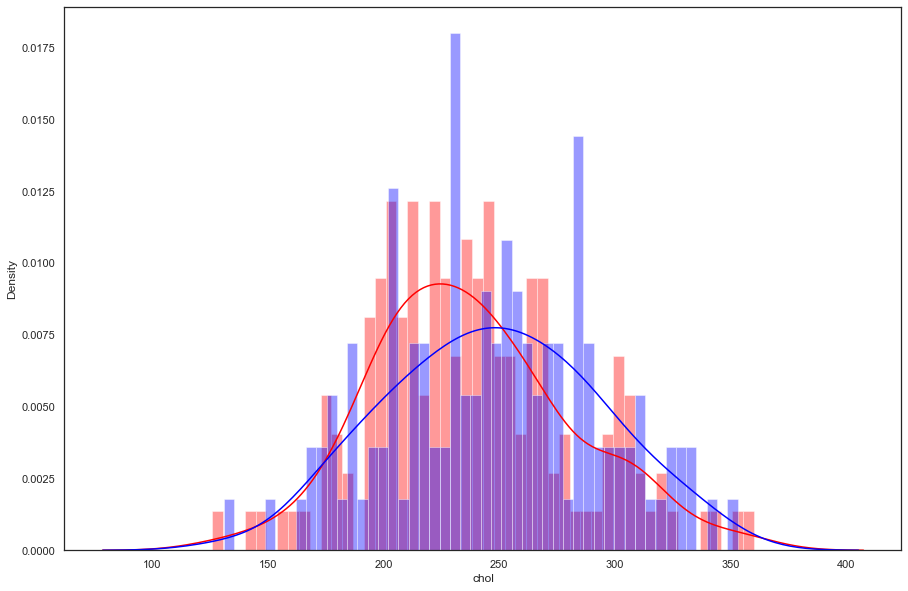

In [61]:
sns.distplot(df[df['target']=='Disease']['chol'],bins=50, color='red')
sns.distplot(df[df['target']=='No_disease']['chol'],bins=50,color='blue')

<AxesSubplot:xlabel='chol', ylabel='Density'>

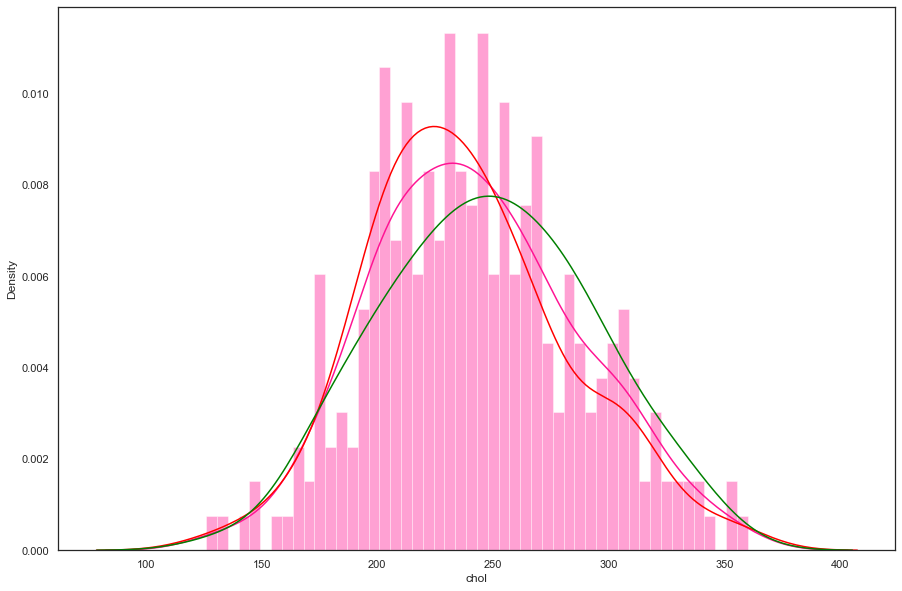

In [62]:
sns.distplot(df['chol'],bins=50,color='deeppink')
sns.kdeplot(df[df['target']=='Disease']['chol'], color='red')
sns.kdeplot(df[df['target']=='No_disease']['chol'],color='green')

<AxesSubplot:xlabel='chol', ylabel='Count'>

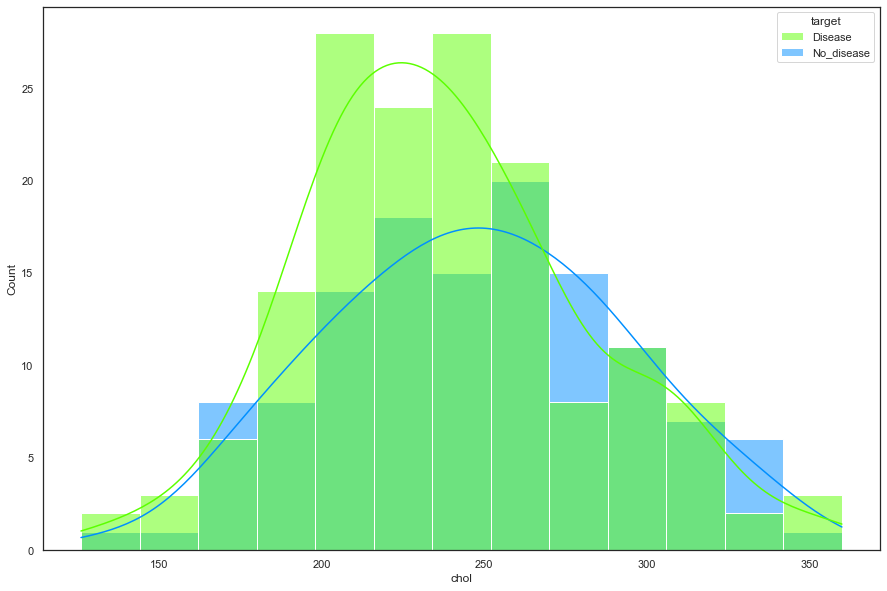

In [63]:
sns.histplot(data=df, x="chol", hue="target",palette='gist_rainbow',kde=True)

Text(0, 0.5, 'Age distribution')

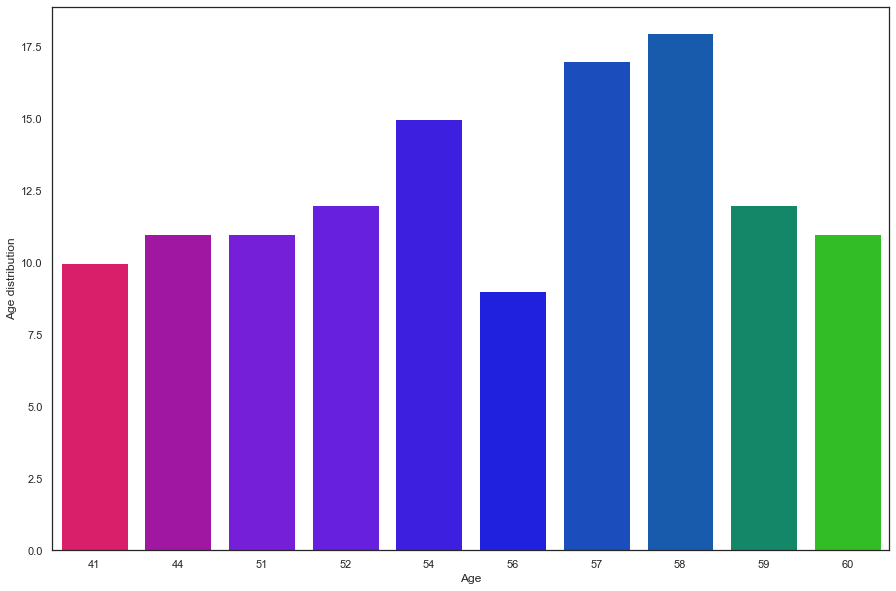

In [64]:
sns.barplot(x=df.age.value_counts()[:10].index,
y=df.age.value_counts()[:10].values,
palette='prism')
plt.xlabel('Age')
plt.ylabel('Age distribution')

Obviously, cholestrol is somewhat influencing CVD.Lots of CVD patients coming under 200-250.
Though No_Disease patients also exist with higher cholestrol level.

# State what relationship exists between peak exercising and the occurrence of a heart attack

In [65]:
df_peak=df[['oldpeak','target']]
df_peak[df_peak['target']=='Disease']['oldpeak'].value_counts()

0.0    72
0.6    10
0.2     9
0.4     8
1.6     6
1.2     6
1.4     6
0.8     6
1.5     4
1.0     4
0.1     4
1.8     3
0.5     3
2.0     2
1.1     2
0.3     2
1.9     2
2.3     2
2.4     1
3.0     1
2.6     1
3.5     1
0.7     1
1.3     1
0.9     1
Name: oldpeak, dtype: int64

In [66]:
df_peak[df_peak['target']=='No_disease']['oldpeak'].value_counts()

0.0    23
1.2    10
1.0     8
2.0     7
1.4     7
1.8     7
2.8     6
0.8     6
2.6     5
2.2     4
3.0     4
0.6     4
3.6     4
0.2     3
0.1     3
1.6     3
0.9     2
2.5     2
3.4     2
2.4     2
3.2     2
1.9     2
3.8     1
0.3     1
1.5     1
0.5     1
2.1     1
2.9     1
0.4     1
3.1     1
4.0     1
Name: oldpeak, dtype: int64

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

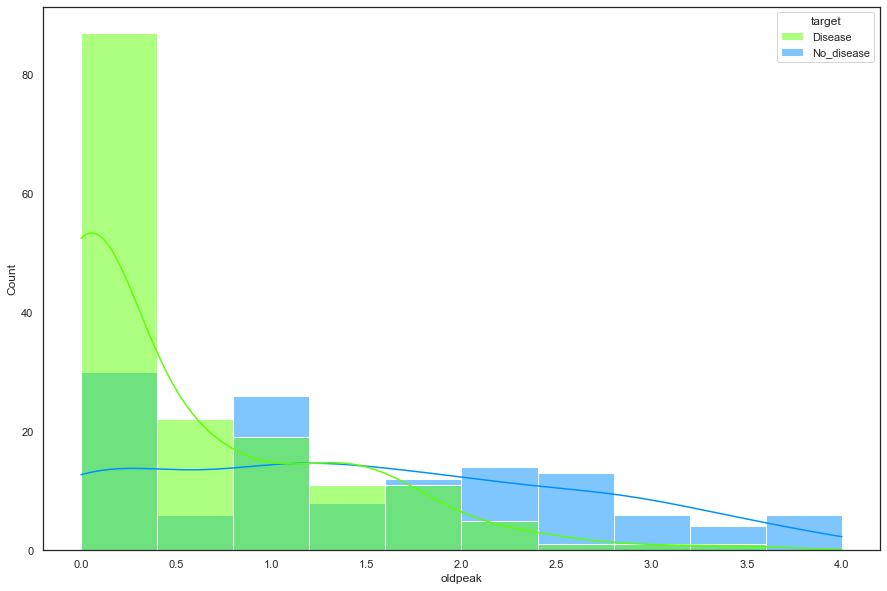

In [67]:
sns.histplot(data=df_peak, x="oldpeak", hue="target",palette='gist_rainbow',kde=True)

In [68]:
#1. cat_plot
def cat_plot(var):
    f,axes = plt.subplots(1,2, figsize = (18,7))
    vc = df[var].value_counts() 
    nouniq = df[var].nunique()
    # overall pie
    vc.plot.pie(radius = 1.25,ax = axes[0], cmap = 'spring', autopct = '%0.1f%%',
                                        textprops = {'family': 'DejaVu Sans','color': 'black','size': 16},
                                        explode = [0.02]*nouniq,shadow = True,)
    axes[0].set_ylabel('')
    axes[0].set_title('Overall {} Distribution\n'.format(var.capitalize()),family='DejaVu Sans',fontsize= 20)
    
    # count plot
    #pd.crosstab(df[var], df.target).plot.bar(cmap = 'hsv', ax = axes[1])
    sns.countplot(x = df[var], hue = df.target, ax = axes[1], palette='gist_rainbow')
    plt.xticks( fontsize = 15, color = 'black' , family =  'DejaVu Sans', rotation = 0)
    axes[1].set_xlabel(var.capitalize(),fontsize = 16, color = 'black' , family =  'DejaVu Sans', rotation = 0)
    axes[1].set_ylabel('Count',fontsize = 16, color = 'black' , family =  'DejaVu Sans')
    axes[1].legend(['Disease -','Disease +'])
    axes[1].set_title('Heart Disease by {}\n'.format( var.capitalize()) ,family='DejaVu Sans',fontsize= 20)
    plt.tight_layout(pad = 4 )
    plt.show()

# Check if thalassemia is a major cause of CVD

In [69]:
df.groupby(['thal','target']).size()

thal               target    
fixed_defect       Disease         6
                   No_disease     11
normal             Disease        25
                   No_disease     80
reversable_defect  Disease       127
                   No_disease     34
dtype: int64

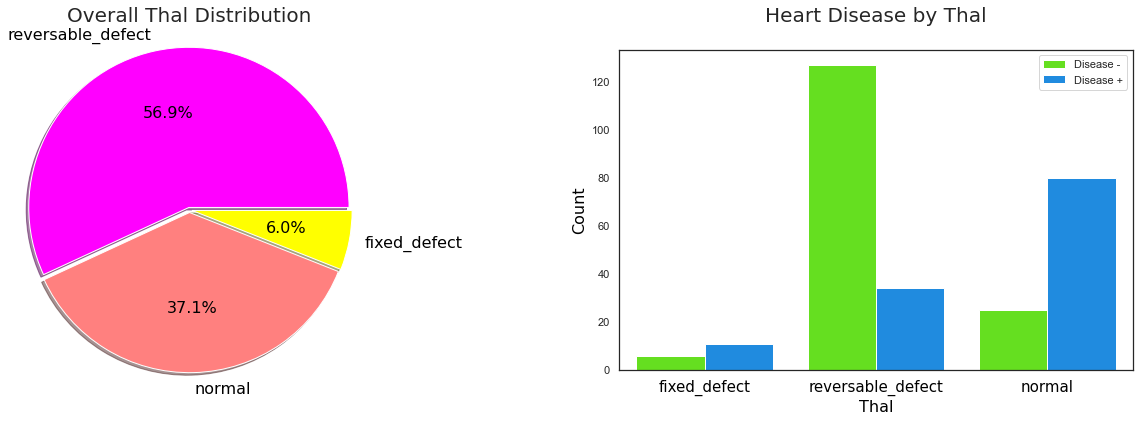

In [70]:
cat_plot('thal')

Looks like thalassemia, is a significant factor in CVD patients.
reversable_defect has the highest cases of 127

# List how the other factors determine the occurrence of CVD

A. Resting_ecg

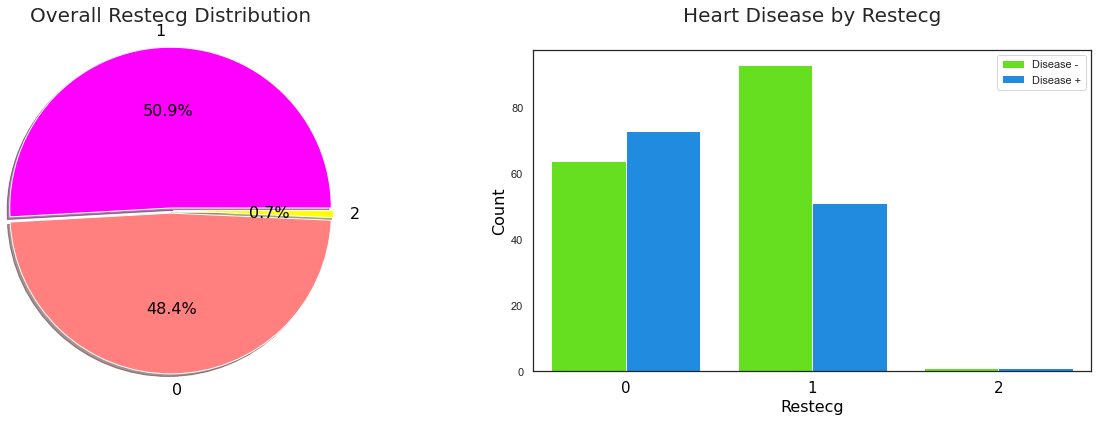

In [71]:
cat_plot('restecg')

B. Fasting Blood Sugar

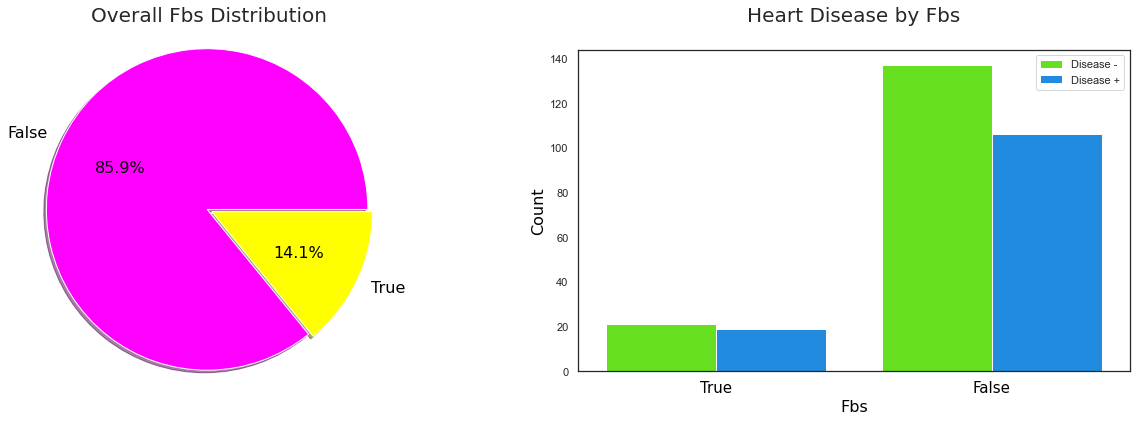

In [72]:
cat_plot('fbs')

# Use a pair plot to understand the relationship between all the given variables

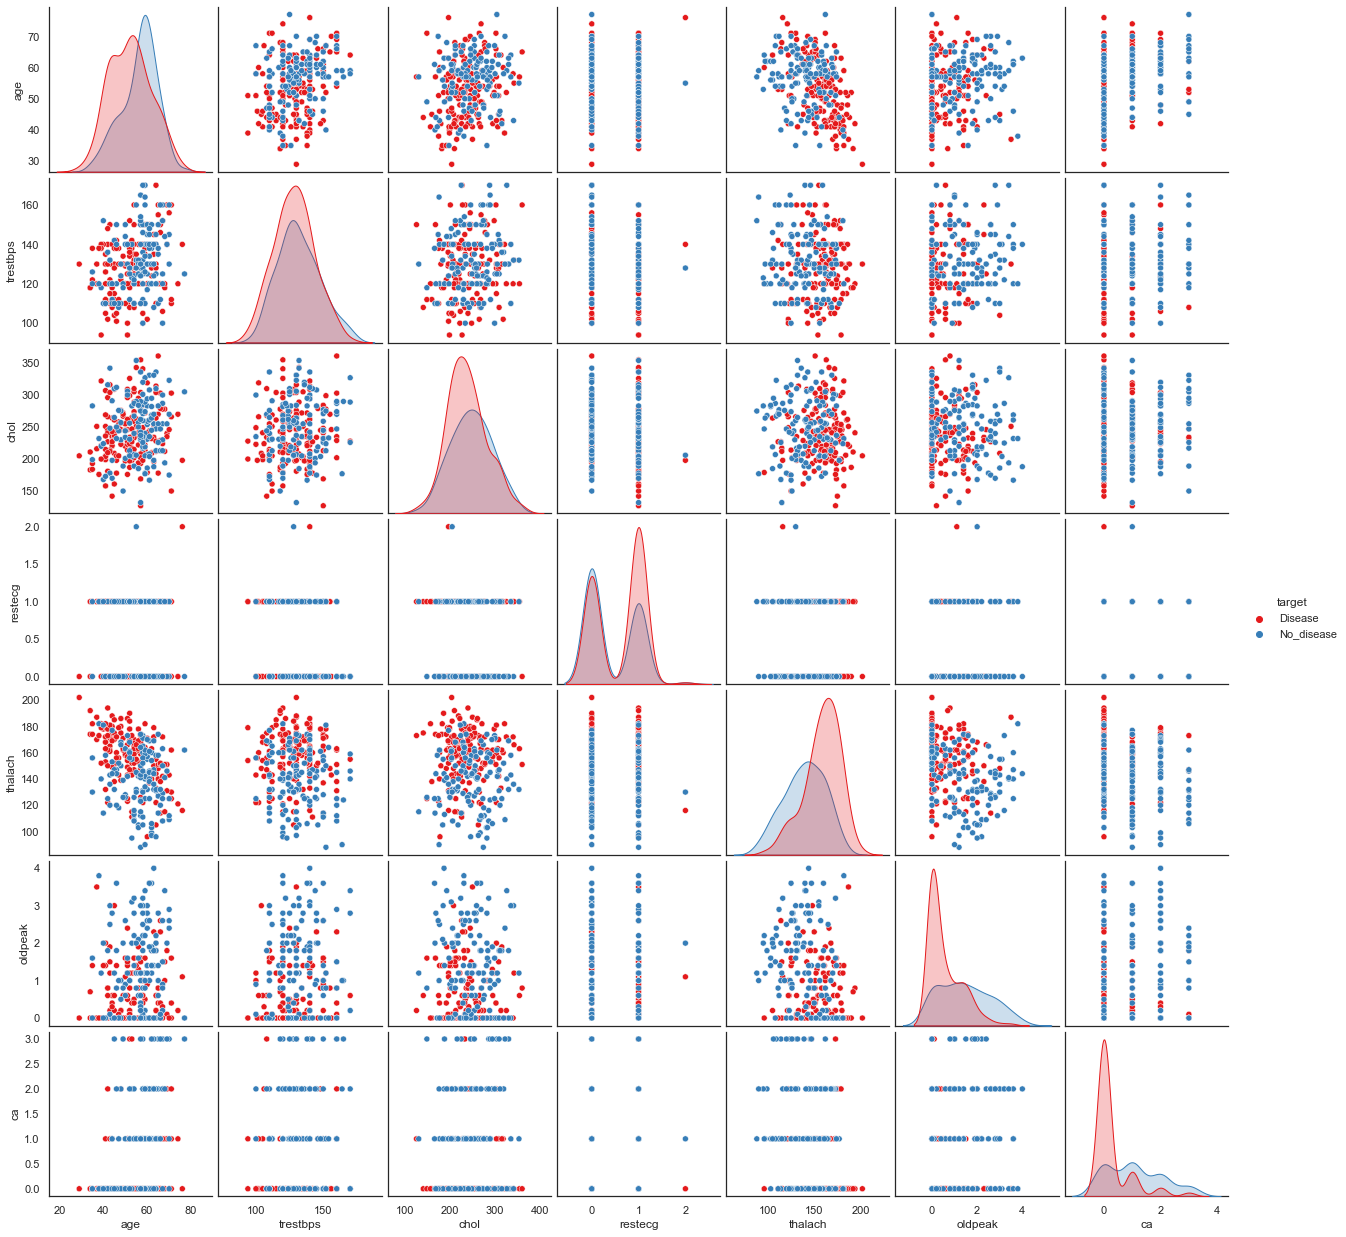

In [73]:
sns.pairplot(df, hue = 'target', palette='Set1')

# Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

Classification: 


Note: This iteration involves only the numerical variables that are registered in the correlation matrix.

<AxesSubplot:>

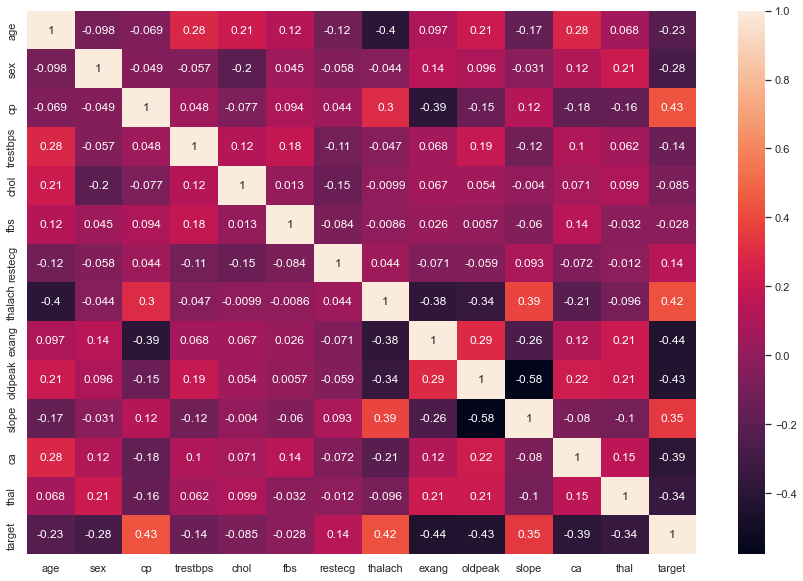

In [74]:
corr=df1.corr()
sns.heatmap(corr, annot=True)

Using Correlation for Feature Selection

Logistic Regression

In [75]:
df2=df1.drop(['sex','cp','fbs','exang','restecg','slope','thal','age_group'], axis=1)
df2

,age,trestbps,chol,thalach,oldpeak,ca,target
0,63,145,233,150,2.3,0,1
1,37,130,250,187,3.5,0,1
2,41,130,204,172,1.4,0,1
3,56,120,236,178,0.8,0,1
4,57,120,354,163,0.6,0,1
...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0
299,45,110,264,132,1.2,0,0
300,68,144,193,141,3.4,2,0
301,57,130,131,115,1.2,1,0


In [76]:
features = pd.DataFrame(df2, columns=df2.columns)
target = pd.DataFrame(df2, columns=['target'])

In [77]:
features=features.drop('target',axis=1)
features

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


In [78]:
features.shape,target.shape

((303, 6), (303, 1))

In [80]:
X_train, X_test, y_train, y_test = split(features, target, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227, 6)
(76, 6)
(227, 1)
(76, 1)


In [81]:
my_logreg_model = LogisticRegression().fit(X_train, y_train)

In [82]:
my_logreg_preds_train = my_logreg_model.predict(X_train)
my_logreg_preds_test = my_logreg_model.predict(X_test)

print('Accuracy on Train set : ',accuracy_score(y_train, my_logreg_preds_train))
print('Accuracy on Test set` : ',accuracy_score(y_test, my_logreg_preds_test))

Accuracy on Train set :  0.801762114537445
Accuracy on Test set` :  0.7236842105263158


Randon Forest Classsifier

In [83]:
import statsmodels.api as sm

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
my_rf_classifier = RandomForestClassifier(n_estimators=100)

In [103]:
my_rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
my_predictions = my_rf_classifier.predict(X_test)

In [105]:
print(accuracy_score(y_test, my_predictions))

0.7368421052631579


In [106]:
my_rf_classifier_train = my_rf_classifier.predict(X_train)
my_rf_classifier_test = my_rf_classifier.predict(X_test)

print('Accuracy on Train set : ',accuracy_score(y_train, my_rf_classifier_train))
print('Accuracy on Test set` : ',accuracy_score(y_test, my_rf_classifier_test))

Accuracy on Train set :  1.0
Accuracy on Test set` :  0.7368421052631579


#### Logistic regression after leveraging standard error and p-values from statsmodels for feature selection

In [89]:
df3=df1.drop('age_group',axis=1)
df3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [90]:
train_LR, test_LR = split(df3, test_size = .30, random_state = 12)
print(train_LR.shape)

train_LR.head()

(212, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


In [91]:
X_train_LR = train_LR.drop('target', axis = 1)
Y_train_LR = train_LR.target
X_test_LR = test_LR.drop('target', axis = 1)
Y_test_LR = test_LR.target

In [92]:
import statsmodels.api as sm
#Apply logistic regression
model_LR = sm.Logit(Y_train_LR, X_train_LR)
model_LR = model_LR.fit()
#Find the summary
model_LR.summary()

Optimization terminated successfully.
         Current function value: 0.343990
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                           12
Date:                Tue, 01 Nov 2022   Pseudo R-squ.:                  0.4983
Time:                        23:47:11   Log-Likelihood:                -72.926
converged:                       True   LL-Null:                       -145.35
Covariance Type:            nonrobust   LLR p-value:                 6.279e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0208      0.023      0.891      0.373      -0.025       0.067
sex           -1.9719      0.560     -3.520      0.000      -3.070      -0.874
cp             0.6065      0.219      2.773      0.006       0.178       1.035
trestbps      -0.0194      0.012     -1.646      0.100      -0.043       0.004
chol          -0.0055      0.005     -1.093      0.274      -0.015       0.004
fbs           -0.1206      0.634     -0.190      0.849      -1.362       1.121
restecg        0.7656      0.415      1.847      0.065      -0.047       1.578
thalach        0.0457      0.012      3.902      0.000       0.023       0.069
exang         -0.8768      0.500     -1.755      0.079      -1.856       0.102
oldpeak       -0.5787      0.262     -2.205      0.027      -1.093      -0.064
slope          0.3027      0.429      0.705      0.481      -0.539       1.144
ca            -0.7334      0.236     -3.112      0.002      -1.195      -0.272
thal          -1.1492      0.352     -3.262      0.001      -1.840      -0.459
==============================================================================
"""

In [93]:
data_Log = df3.drop(['age','trestbps','chol','fbs','restecg','exang','slope'], axis=1)

In [94]:
train_Log, test_Log = split(data_Log, test_size = .30, random_state = 12)

In [95]:
print(train_Log.shape)

train_Log.head()

(212, 7)


,sex,cp,thalach,oldpeak,ca,thal,target
29,1,2,152,1.2,0,2,1
189,1,0,158,0.0,0,3,0
277,1,1,141,0.3,0,3,0
68,1,1,170,0.0,0,2,1
144,0,2,116,1.1,0,2,1


In [96]:
print(test_Log.shape)

test_Log.head()

(91, 7)


,sex,cp,thalach,oldpeak,ca,thal,target
92,1,2,169,0.0,4,2,1
85,0,2,160,1.6,0,3,1
75,0,1,161,1.4,0,2,1
233,1,0,96,2.2,1,2,0
243,1,0,88,1.2,1,3,0


In [97]:
X_train_Log = train_Log.drop('target', axis = 1)
Y_train_Log = train_Log.target
X_test_Log = test_Log.drop('target', axis = 1)
Y_test_Log = test_Log.target

In [98]:
#Apply logistic regression
model_Log = sm.Logit(Y_train_Log, X_train_Log)
model_Log = model_Log.fit()
#Find the summary
model_Log.summary()

Optimization terminated successfully.
         Current function value: 0.376542
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Nov 2022   Pseudo R-squ.:                  0.4508
Time:                        23:47:13   Log-Likelihood:                -79.827
converged:                       True   LL-Null:                       -145.35
Covariance Type:            nonrobust   LLR p-value:                 1.429e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.5831      0.467     -3.387      0.001      -2.499      -0.667
cp             0.6741      0.201      3.359      0.001       0.281       1.067
thalach        0.0315      0.005      5.773      0.000       0.021       0.042
oldpeak       -0.8695      0.223     -3.896      0.000      -1.307      -0.432
ca            -0.6803      0.215     -3.161      0.002      -1.102      -0.258
thal          -1.2232      0.310     -3.950      0.000      -1.830      -0.616
==============================================================================
"""

In [99]:
pred_Log = model_Log.predict(X_test_Log)
model_Log.predict(X_train_Log)

29     0.744599
189    0.433228
277    0.403311
68     0.881540
144    0.832644
         ...   
259    0.311436
130    0.966534
241    0.887396
253    0.097127
155    0.762094
Length: 212, dtype: float64

In [100]:
(model_Log.predict(X_train_Log) >= 0.5).astype(int)
model_Log.pred_table()

array([[ 73.,  20.],
       [  9., 110.]])

In [101]:
print((73+110)/(73+20+9+110))

0.8632075471698113
